# **Quiz Pekan - 3**

# Soal 1 : Apakah harapan kalian saat mengikuti kelas Python Datascience dasar? 

Jawab:


Saya berharap bisa menguasai fundamental Data Science dan menambah pengetahuan saya. Kemudian juga setelah mengikuti kelas ini saya berharap bisa lanjut ke kelas data science lanjutan berikutnya. Karena tertarik juga untuk bisa belajar tentang data.


## **Penjelasan Dataset**
Dataset-dataset berikut ini menunjukkan score happines dunia. Score happiness menggunakan data dari GallUp world poll. Data feature yang menjadi kata kunci di report ini adalah:

*  **Life Ladder** >> Ibarat sebuah tangga, pijakan 0 adalah dasar dan 10 adalah atas. Tangga atas menunjukkan  kehidupan terbaik  dan dasar tangga menunjukkan kehidupan terburuk 
*   **Log GDP Per capita** >> nilai ekonomi yang dihasilkan setiap individu warga
*  **Social support**  >> dukungan sosial seperti keluarga, teman, tetangga dll
*   **Healthy life expectancy at birth** >> rata-rata hidup dalam kesehatan yang baik
*   **Freedom to make life choices** >> Peluang tiap individu untuk melakukan aksi yang dipilih
*   **Generosity** >> Kemurahan hati
*  **Perceptions of corruption**  >> Korupsi


Link Download:

[world-happiness-report.csv](https://drive.google.com/uc?export=download&id=14yujHboPMR5tc_n3btPcFW4fXgy4-SzL)

[world-happiness-report-2021.csv](https://drive.google.com/uc?export=download&id=1gWCX58PyH0viABEMswzJ71sJ0v5KHco3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#import semua data

df1 = pd.read_csv('world-happiness-report.csv')
df2 = pd.read_csv('world-happiness-report-2021.csv')

# Soal 2 : Tunjukkan summary statistik dari dataset world happiness 2021 seperti expected output berikut. 



*   Tunjukkan summary statistik dari dataset df2



HINT:
Teman-teman perlu mendrop beberapa kolom yang tidak ditampilkan di tabel expected output dengan menggunakan atribut .drop() dari pandas DataFrame. Silahkan kunjungi referensi link berikut:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [3]:
#code here
df2_filter = df2.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia'\
          , 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',\
          'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1)

df2_filter.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


Expected output:

![Expected Output:](https://drive.google.com/uc?id=1wvMxczKvP94GTAGTWmjoBydNOkK0OqU2)



---



---



# Soal 3: Happiness report negara Indonesia dari tahun 2006 - 2021

Output yang diharapkan adalah data negara Indonesia dari penggabungan dataset happiness report dan dataset happiness report 2021. Untuk sesuai dengan expected ouput, lakukan perintah-perintah berikut:


1.   Lakukan filtering dataset happiness report dari kolom ['Country name']== 
'Indonesia'
        - tambahkan atribut .reset_index(drop=True)
        - drop kolom 'Positive affect' dan 'Negative affect'

2.   Lakukan filtering dataset dari variabel no 2 (hasil dropping beberapa kolom sebelumnya)
        - tambahkan kolom ['year']=2021 pada dataset dari variabel no 2 (hasil dropping beberapa kolom)
        - filtering dataset tersebut menggunakan kolom ['Country name']== 
'Indonesia'
        - rename beberapa kolom dengan menggunakan atribut .rename() dari pandas, referensi dokumentasi : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
                {      
               'Ladder score':'Life Ladder',
               'Logged GDP per capita':'Log GDP per capita',
                'Healthy life expectancy':'Healthy life expectancy at birth'}

        - drop kolom 'Dystopia + residual' dan 'Regional indicator'

3. Gabungkan data dari hasil poin 1 dan poin 2
    -  gunakan pandas concat, .concat()
    - tambahkan atribut .reset_index(drop=True)
    - rename kolom {'year':'Year'}


In [4]:
#code here
# perintah 1
df1_filter = df1[df1['Country name'] == 'Indonesia'].reset_index(drop=True)
df1_filter.drop(['Positive affect', 'Negative affect'], axis=1, inplace=True)

# perintah 2
df2_filter['year'] = 2021
df2_filter = df2_filter.copy()[df2_filter['Country name'] == 'Indonesia']
df2_filter.rename(
    columns={
        'Ladder score':'Life Ladder',
        'Logged GDP per capita':'Log GDP per capita',
        'Healthy life expectancy':'Healthy life expectancy at birth'
        }, inplace=True
)
df2_filter.drop(['Dystopia + residual', 'Regional indicator'], axis=1, inplace=True)

df = pd.concat([df1_filter, df2_filter]).reset_index(drop=True).rename(columns={'year':'Year'})

df

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Indonesia,2006,4.947,8.850,0.771,59.840,0.713,0.347,0.915
1,Indonesia,2007,5.101,8.898,0.704,59.980,0.603,0.311,0.960
2,Indonesia,2008,4.815,8.943,0.675,60.120,0.596,0.164,0.968
3,Indonesia,2009,5.472,8.975,0.779,60.260,0.784,0.191,0.911
4,Indonesia,2010,5.457,9.022,0.816,60.400,0.700,0.448,0.954
5,Indonesia,2011,5.173,9.069,0.825,60.620,0.878,0.438,0.962
6,Indonesia,2012,5.368,9.114,0.834,60.840,0.770,0.354,0.962
7,Indonesia,2013,5.292,9.155,0.794,61.060,0.781,0.376,0.973
8,Indonesia,2014,5.597,9.190,0.905,61.280,0.719,0.408,0.970
9,Indonesia,2015,5.043,9.225,0.809,61.500,0.779,0.471,0.946


Expected output:

![Expected Output:](https://drive.google.com/uc?id=1FRTJ03i_khNOWeIeEGaAOSsurwKlZ8ex)



---



---



# Soal 4: Visualisasi lineplot Life Ladder negara Indonesia

*   Gunakan library seaborn untuk plotting line plot kolom Life Ladder dari hasil penggabungan negara Indonesia tahun 2006-2021 (soal 3) seperti expected output, jika tidak bisa menyelesaikan soal 3 silahkan download data berikut 
[Download.csv](https://drive.google.com/uc?export=download&id=19g5oURnRNlbXPUEQQyvimoEx8DwqMPLW) 
*   Berikan insight dari hasil visualisasi tersebut

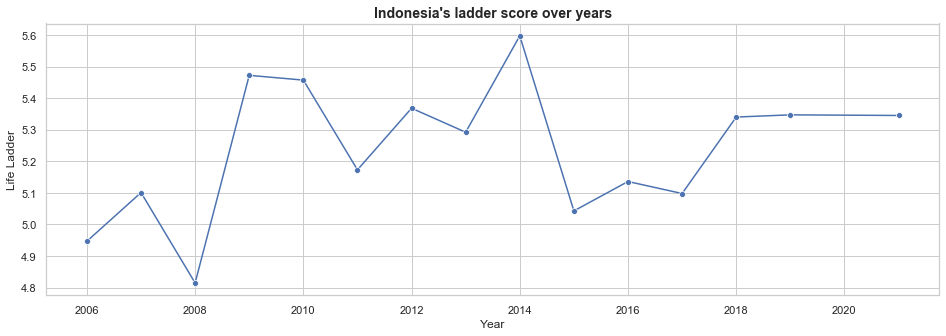

In [5]:
#code here
plt.figure(figsize=(16,5))
sns.set(style='whitegrid')

# with sns.axes_style("whitegrid"):
sns.lineplot(data=df, x='Year', y='Life Ladder', marker='o')
plt.title("Indonesia's ladder score over years", weight='bold', fontsize=14)
plt.show()

Expected output:

![Expected Output:](https://drive.google.com/uc?id=16Qlf66XYLNSGtJpCx1hWkQI0CmffaaGW)

#### Berikan insight disini:

- Indeks kebahagiaan tertinggi negara Indonesia berada pada tahun 2014 dengan nilai 5.6.
- Indeks kebahagiaan terendah negara Indonesia berada pada tahun 2008 dengan nilai 4.8.
- Kenaikan indeks kebahagiaan negara Indonesia secara signifikan berada ketika tahun 2008 menuju 2009.
- Penurunan indeks kebahagiaan negara Indonesia secara signifikan berada ketika tahun 2014 menuju 2015.

# Soal 5: Urutkan Ladder Score tertinggi dengan negara-negara Asia Tenggara seperti expected output

Untuk mendapatkan expected output, lakukan perintah-perintah berikut:

*   Sorting data berdasarkan kolom 'Ladder Score' dari dataset world happiness 2021 dengan hanya menampilkan kolom ['Country name', 'Ladder score', 'Regional indicator']. Sorting data menggunakan sort_values() dari pandas, silahkan kunjungi dokumentasi berikut: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
*   Urutan pertama diperoleh dari hasil filtering dengan kondisi ['Ladder score']==['Ladder score'].max()

*   Urutan negara-negara Asia tenggara diperoleh dari hasil Filtering kolom ['Regional indicator'] == 'Southeast Asia'
*   Lakukan concatination antara data Urutan pertama dengan urutan negara Asia Tenggara menggunakan pd.concat()
*   Tambahkan kolom ['Rank'] yang berisi dari indeks hasil penggabungan
*   drop kolom 'Regional indicator'


In [6]:
#code here
df3 = df2.sort_values('Ladder score', ascending=False)[['Country name', 'Ladder score', 'Regional indicator']]
filter1 = df3['Ladder score'] == df3['Ladder score'].max()
filter2 = df3['Regional indicator'] == 'Southeast Asia'

df4 = pd.concat([df3[filter1], df3[filter2]]).reset_index()
df4.drop('Regional indicator', axis=1, inplace=True)
df4['index'] += 1
df4 = df4[['Country name', 'Ladder score', 'index']].rename(columns={'index': 'Rank'})

df4

,Country name,Ladder score,Rank
0,Finland,7.842,1
1,Singapore,6.377,32
2,Thailand,5.985,54
3,Philippines,5.880,61
4,Vietnam,5.411,79
5,Malaysia,5.384,81
6,Indonesia,5.345,82
7,Laos,5.030,100
8,Cambodia,4.830,114
9,Myanmar,4.426,126


Expected output:

![Expected Output:](https://drive.google.com/uc?id=1JTwA9auco2loNLRXHQFy0k6EpFhJeqA5)

Bagaimana Rank Ladder score negara Indonesia jika dibandingkan dengan negara asean lainnya dan secara global?

jawab disini:

Di antara negara Asean lainnya, peringkat Indonesia berada di peringkat 6 dari 9 negara Asean lainnya. Secara global sendiri berada di peringkat 82 di dunia. Peringkat tersebut terbilang cukup rendah.

# Soal 6: Visualisasi Scatter plot dan Regression plot

Buatlah visualisasi scatter plot (perpaduan seaborn dan matplotlib), Scatter plot menggunakan Matplotlib dan regresi plot menggunakan Seaborn dari df2 antara GDP per capita ('Logged GDP per capita') dan  skor korupsi ('Perceptions of corruptions')  sesuai expected output dengan ketentuan berikut:

Gunakan kolom skor kebebasan beraksi ('Freedom to make life choices') sebagai ukuran pointnya kalikan suatu angka yang cukup besar agar terlihat.

Gunakan kolom skor kesehatan ('Healthy life expectancy') sebagai warna point, berikan cmap 'plasma'.

Gunakan regplot pada seaborn (sns.regplot) dengan argumen scatter=False dan color = 'black'

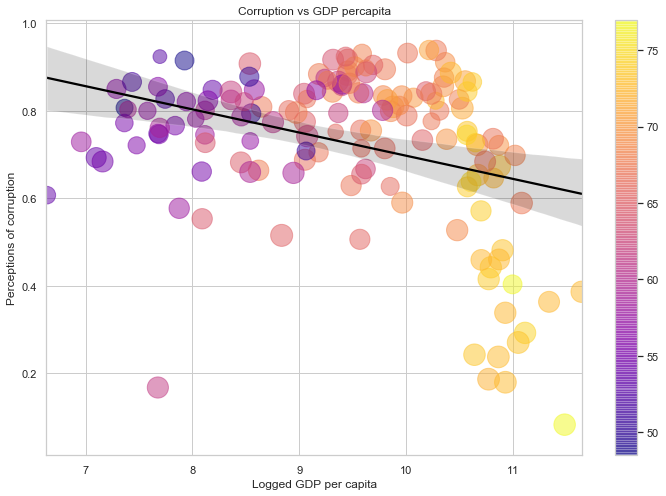

In [7]:
#code here
fig, ax = plt.subplots(figsize=(12,8))

plot = ax.scatter(df2['Logged GDP per capita'], df2['Perceptions of corruption'], s=df2['Freedom to make life choices']*500\
           , c=df2['Healthy life expectancy'], cmap='plasma', alpha=0.5)
sns.regplot(data=df2, x='Logged GDP per capita', y='Perceptions of corruption', scatter=False, color='black')

plt.colorbar(plot)
plt.xlim([6.63,11.65])
plt.title('Corruption vs GDP percapita')
plt.show()

Expected output:

![Expected Output:](https://drive.google.com/uc?id=1KlQcNK6RNMNGoRkxwo4KPUgX40efZH7a)

Berikan insight dari hasil visualisasi diatas!

Jawab disini:

Dapat dilihat dari hasil visualisasi di atas bahwa terdapat hubungan linear negatif antara variabel Logged GDP per capita dan variabel Perceptions of corruption walaupun kekuatan hubungannya tidak cukup kuat.